<a href="https://colab.research.google.com/github/VasRamesh/chess-cheat-hunter/blob/main/02-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load in saved Dataframe from MLChessProject_03

In [2]:
import pandas as pd
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/acc_data.pkl', 'rb') as f:
  acc_data = pickle.load(f)
  acc_data.reset_index(drop=True, inplace=True) # Fix errors made by threading

### The data table
29,400 datapoints! We're rich (data-wise)

In [ ]:
acc_data

,w_username,w_accuracy,w_rating,b_username,b_accuracy,b_rating
0,DilePuppa,60.52,1497,---Faniel,77.03,1514
1,---Faniel,70.32,1600,nunosa1965,44.20,1730
2,egor2,74.41,1472,---Faniel,85.31,1614
3,Korabl1,88.21,1612,---Faniel,92.09,1579
4,---Faniel,48.09,1610,ajampana,80.96,1603
...,...,...,...,...,...,...
29409,RosalieChuma,83.78,575,accordiondr,62.84,538
29410,accordiondr,76.81,513,Swaykers,62.21,483
29411,accordiondr,53.79,500,jacobhaley12,80.80,532
29412,kevinmphasha,80.62,1259,AccordionFlay,76.38,1224


In [5]:
#TODO: Visualize the data
import matplotlib.pyplot as plt
import numpy as np
import math

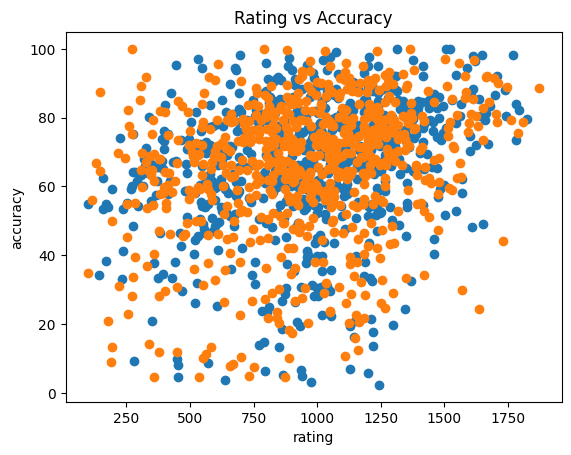

In [ ]:
# Scatter plot of first 100 games
i = 700
plt.scatter(acc_data['w_rating'][:i], acc_data['w_accuracy'][:i])
plt.scatter(acc_data['b_rating'][:i], acc_data['b_accuracy'][:i])
plt.xlabel("rating")
plt.ylabel("accuracy")
plt.title('Rating vs Accuracy')
plt.show()

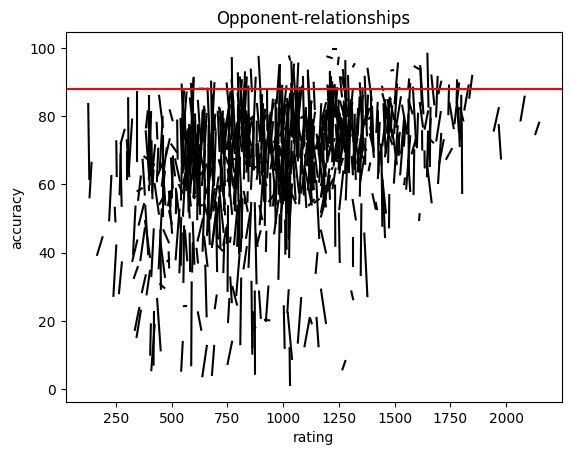

In [ ]:
# Create line-scatter:
for i in range(4000):
  x1 = acc_data['w_rating'][i]
  y1 = acc_data['w_accuracy'][i]
  x2 = acc_data['b_rating'][i]
  y2 = acc_data['b_accuracy'][i]
  distance = float(math.sqrt((y1-y2)**2+(x1-x2)**2))
  if distance < 25:
    plt.plot([x1, x2], [y1, y2], 'k-')


plt.title("Opponent-relationships")
plt.xlabel("rating")
plt.ylabel("accuracy")
plt.axhline(y=88, color='red')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

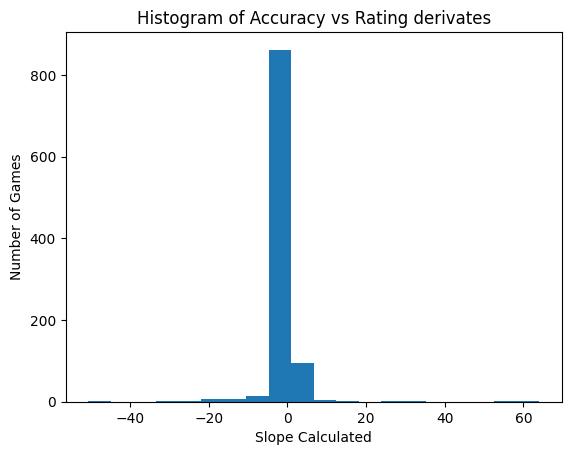

In [ ]:
# Calculate the slopes(derivatives) to see if there's any significance:
slopes = []
for i in range(1000):
  x1 = acc_data['w_rating'][i]
  y1 = acc_data['w_accuracy'][i]
  x2 = acc_data['b_rating'][i]
  y2 = acc_data['b_accuracy'][i]
  demon = x1 - x2
  if demon != 0: slopes.append((y1 - y2)/demon)


plt.hist(slopes, bins=20)
plt.xlabel('Slope Calculated')
plt.ylabel('Number of Games')
plt.title('Histogram of Accuracy vs Rating derivates')
plt.show

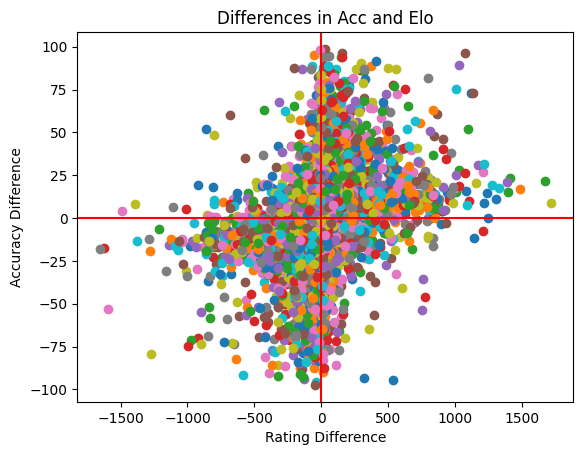

In [ ]:
# Calculate and plot acc and rating differences
for i in range(10000):
  x1 = acc_data['w_rating'][i]
  y1 = acc_data['w_accuracy'][i]
  x2 = acc_data['b_rating'][i]
  y2 = acc_data['b_accuracy'][i]
  x = x1-x2
  y = y1-y2
  plt.scatter(x, y) # consider abs()

plt.xlabel('Rating Difference')
plt.ylabel('Accuracy Difference')
plt.title("Differences in Acc and Elo")
plt.axhline(y=0, color='red')
plt.axvline(x=0, color='red')
plt.show()

In [ ]:
#TODO: Maybe analyze multiple games of 1 player and see if there is a relationship
acc_data[5000:5040]
# High accuracy coupled with low opponent accuracy is normal *


,w_username,w_accuracy,w_rating,b_username,b_accuracy,b_rating
5000,1apace,19.21,893,nachofries12,2.80,816
5001,1apace,67.78,854,AldisApsitis,24.61,1006
5002,mbernis,67.26,999,1apace,39.44,762
5003,GeorgeG82,76.12,935,1apace,61.40,840
5004,1apace,57.15,768,WorstPlayerUSA,71.70,655
5005,1appleseed1,75.29,1068,RaspyPorcupine,94.21,1269
5006,GlizzyBoi69420,80.11,1103,1appleseed1,67.52,1028
5007,MarshmellowApocalypse,81.31,1005,1Arahat,70.67,695
5008,DrMundoe,57.89,927,1arho,75.71,896
5009,tutunmausikapati,64.81,832,1arho,73.60,927


In [ ]:
# Similarity measure (I choose)
# Anomoly detection

Slope vs Length

<function matplotlib.pyplot.show(close=None, block=None)>

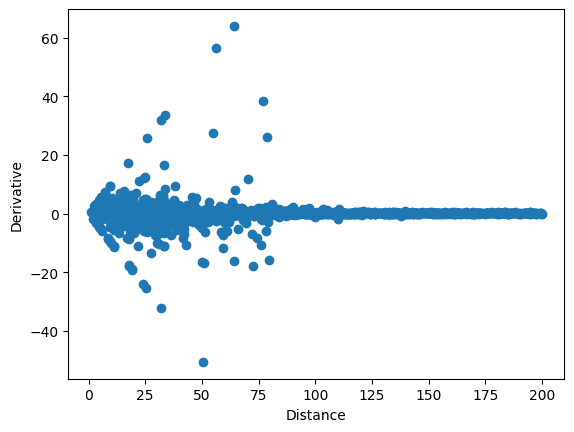

In [ ]:
# Calculate the slopes(derivatives) to see if there's any significance:
slopes = []
distances = []
for i in range(3000):
  x1 = acc_data['w_rating'][i]
  y1 = acc_data['w_accuracy'][i]
  x2 = acc_data['b_rating'][i]
  y2 = acc_data['b_accuracy'][i]
  demon = x1 - x2
  distance = math.sqrt((y1-y2)**2+(x1-x2)**2)
  if demon != 0 and distance < 200:
    slopes.append((y1 - y2)/demon)
    distances.append(distance)

plt.scatter(distances, slopes)
plt.xlabel('Distance')
plt.ylabel('Derivative')
plt.show

In [ ]:
"""
 High distance, Low slope = normal (horizontal line)
 Low distance, High slope = suspicious (especially with negative slope)

  Goal here: chess.com already has complex algo analyzing each move to see consistency;
  # We want to flag suspicous games faster (rather than analyzing multiple games) so that
  # Cheaters get watched/caught faster and have less negative effect on others

"""

In [ ]:
# Cheater: Figure out how to model this!
"""
1. Very High accuracy while opponent also has moderately good accuracy
2. Lower slopes (High slope, Distance = Capitalize on opponent blunders) and Low Distance
"""


29414

In [ ]:
# Statistical analysis:
import statistics
mean = statistics.mean(acc_data['w_accuracy'][:1000])
mean

64.85743

##### Elo distribution

<function matplotlib.pyplot.show(close=None, block=None)>

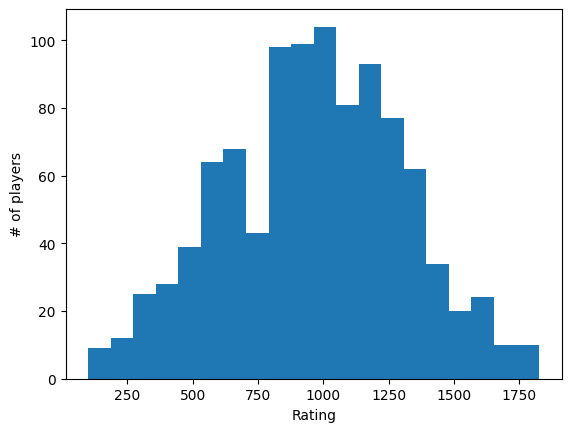

In [ ]:
plt.hist(acc_data['w_rating'][:1000], bins=20)
plt.xlabel('Rating')
plt.ylabel('# of players')
plt.show

### Accuracy distribution

<function matplotlib.pyplot.show(close=None, block=None)>

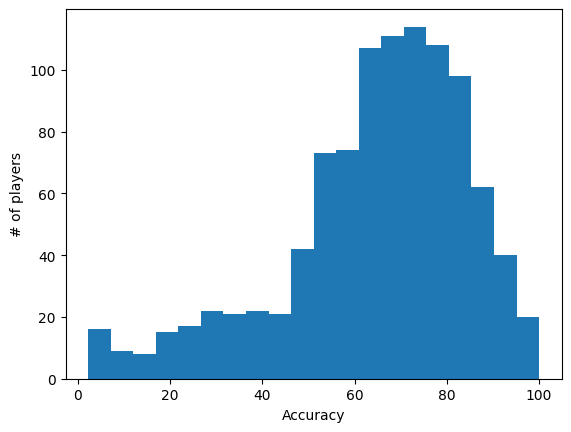

In [ ]:
plt.hist(acc_data['w_accuracy'][:1000], bins=20)
plt.xlabel('Accuracy')
plt.ylabel('# of players')
plt.show

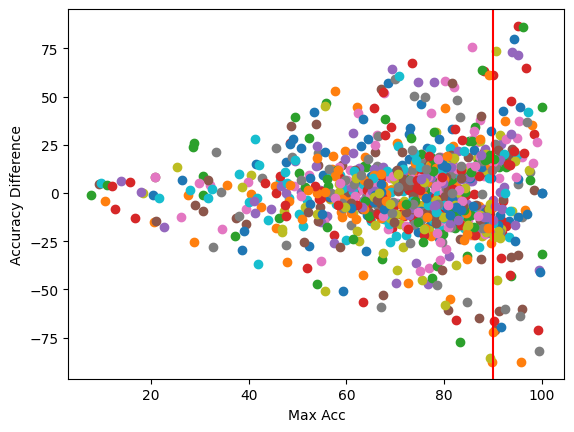

In [8]:
# Rating diff vs Max Rating:
for i in range(1000):
  y1 = acc_data['w_accuracy'][i]
  y2 = acc_data['b_accuracy'][i]
  acc_diff = y1-y2
  max_acc = max(y1, y2)
  plt.scatter(max_acc, acc_diff) # consider abs()

plt.xlabel('Max Acc')
plt.ylabel('Accuracy Difference')
plt.axvline(x=90, color='red')
plt.show()

### If max(w_acc, b_acc) > 90

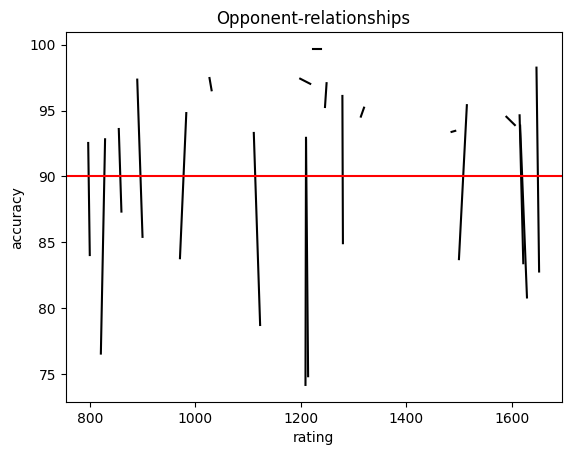

In [17]:
# Create line-scatter:
for i in range(4000):
  x1 = acc_data['w_rating'][i]
  y1 = acc_data['w_accuracy'][i]
  x2 = acc_data['b_rating'][i]
  y2 = acc_data['b_accuracy'][i]
  distance = float(math.sqrt((y1-y2)**2+(x1-x2)**2))
  if distance < 20 and max(y1, y2) > 92:
    plt.plot([x1, x2], [y1, y2], 'k-')


plt.title("Opponent-relationships")
plt.xlabel("rating")
plt.ylabel("accuracy")
plt.axhline(y=90, color='red')
plt.show()